<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/10_Multiple_Regression_Cheat_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

We setup the Python environment and load in the Auto dataset we'll be working with. This is a dataset of information about 392 cars.

# Load in Packages

In [ ]:
%pip install ISLP
from ISLP import load_data #Package containing dataset
import pandas as pd # pandas (DataFrames)
import seaborn as sns # graphs
import statsmodels.formula.api as smf # regression models
import numpy as np
# installing and importing the custom diagnostics module
%pip install git+https://github.com/tb-harris/diagnostics.git
from diagnostics import LinearRegDiagnostic
from scipy import stats

  Cloning https://github.com/tb-harris/diagnostics.git to /tmp/pip-req-build-foxbh36y
  Running command git clone --filter=blob:none --quiet https://github.com/tb-harris/diagnostics.git /tmp/pip-req-build-foxbh36y
  Resolved https://github.com/tb-harris/diagnostics.git to commit 63e7ed899813d387d104118e3b35d435b398c0df
  Preparing metadata (setup.py) ... done
  Created wheel for diagnostics: filename=diagnostics-0.1-py3-none-any.whl size=4726 sha256=32c06cabb8295048e18caef1e7b1d62ed8e9b9324fe35f553dd71401c528dbb7
  Stored in directory: /tmp/pip-ephem-wheel-cache-jq3s3its/wheels/dc/6f/7f/5d7dbbdace3319b3bc68e42a4691a9f8e3605e00b9f8b8ce2b
Successfully built diagnostics


# Load in and Preview Dataset

In [ ]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


We are interested in predicting the miles per gallon (mpg) of these cars using three other variables:

* The displacement of the car's engine. This is a measure (in cubic inches) of how much air the pistons in the car's cylinders displace.
* The horsepower of the engine
* The car's weight in pounds

As such, we subset the dataframe to remove all other variables

In [ ]:
Auto_subset = Auto[['mpg', 'displacement', 'horsepower', 'weight']]
Auto_subset.head()

,mpg,displacement,horsepower,weight
name,,,,
chevrolet chevelle malibu,18.0,307.0,130,3504
buick skylark 320,15.0,350.0,165,3693
plymouth satellite,18.0,318.0,150,3436
amc rebel sst,16.0,304.0,150,3433
ford torino,17.0,302.0,140,3449


# Visualizing Variables

Before we do any analyses, we want to visualize the distributions of these variables. A nice way to concisely do this is by using the `pairplot()` function that is part of the seaborn library

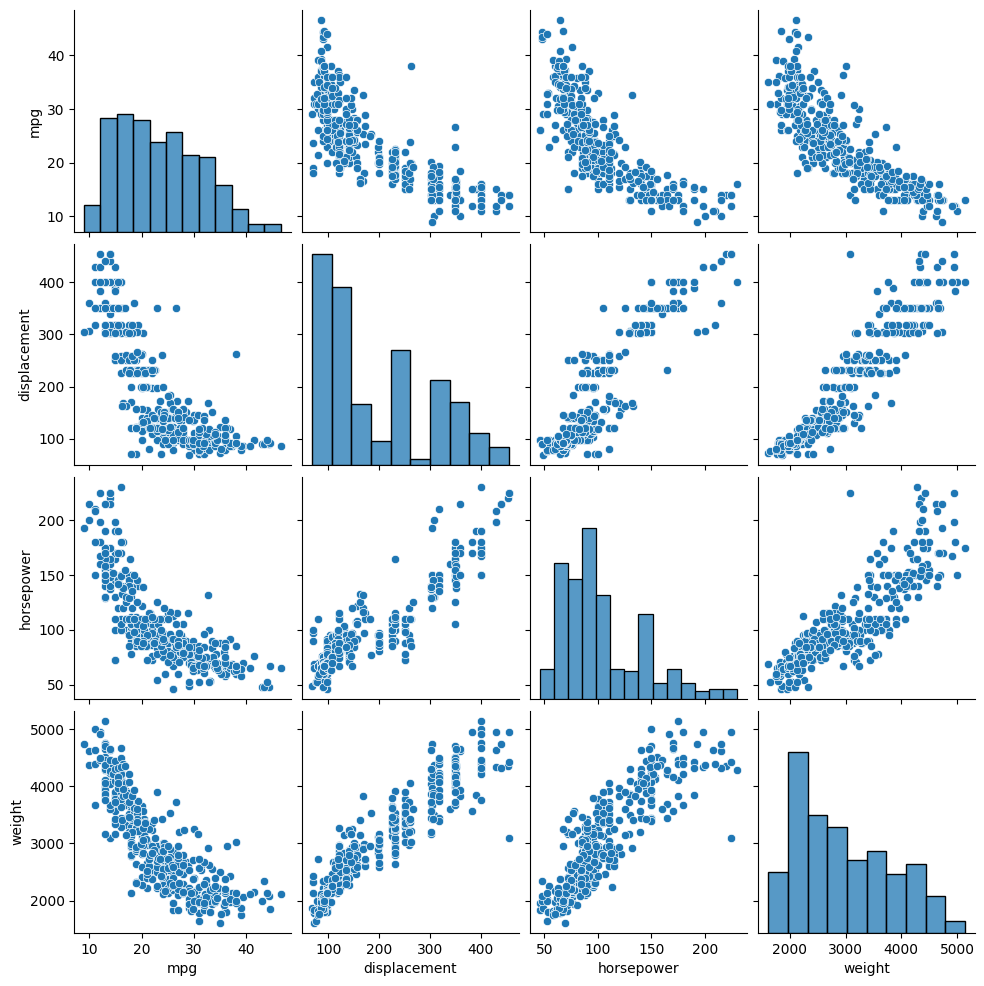

In [ ]:
sns.pairplot(Auto_subset)

Based on this graph, we see possible non-linearities between mpg and the other variables even though mpg itself isn't highly skewed. Furthermore, displacement, horsepower, and weight all seem strongly skewed right. This suggests the need for possible transformations which we keep in mind for later.

# Fitting a Regression Model

We now fit a multiple regression model with all of our variables.

In [ ]:
model_full = smf.ols(data=Auto_subset, formula="Q('mpg') ~ displacement + horsepower + weight").fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q('mpg')   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     312.0
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          5.10e-103
Time:                        15:16:08   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2249.
Df Residuals:                     388   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.8559      1.196     37.507      0.000      42.505      47.207
displacement    -0.0058      0.007     -0.876      0.381      -0.019       0.007
horsepower      -0.0417      0.013     -3.252      0.001      -0.067      -0.016
weight          -0.0054      0.001     -7.513      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       37.603   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.946
Skew:                           0.707   Prob(JB):                     1.43e-11
Kurtosis:                       4.029   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Diagnostics

We now run diagnostics on our model so that we can make any adjustments that are needed

### VIF

We first look at the VIF which stands for Variance Inflation Factor. This is a measure of *multicollinearity* within our model. We are looking for the VIF on all variables to be below 5 or 10 which indicates that the variables are **not** highly dependent on one another.

In [ ]:
diag_object = LinearRegDiagnostic(model_full)
diag_object.vif_table()

,Features,VIF Factor
2,horsepower,5.29
3,weight,7.96
1,displacement,10.31
0,Intercept,31.16


The VIF for our variables is high (all three variables are above 5, and displacement is above 10). This indicates significant multicollinearity and that we should **not** include all these variables in our model simultaneously! We'll go through the other diagnostics and then return to this issue later.

### Scale Location and Residual Plots

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

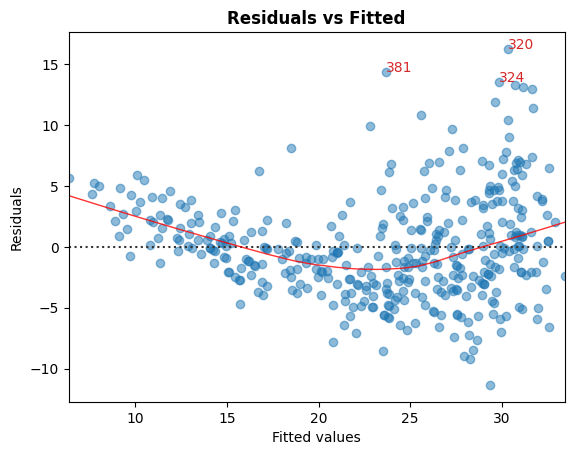

In [ ]:
diag_object.residual_plot()

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

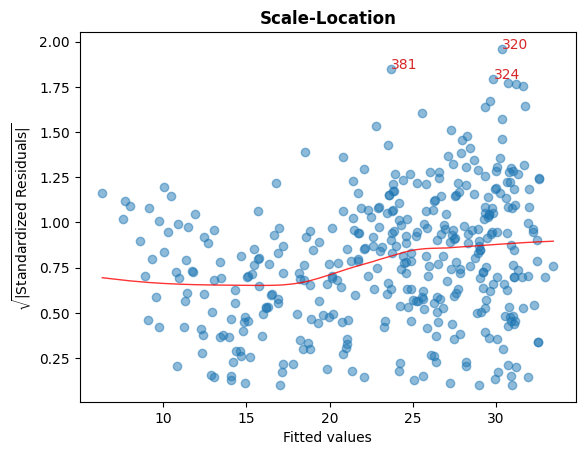

In [ ]:
diag_object.scale_location_plot()

We're looking for there to be no major patterns in the residuals. We see that there seems to be a curved relationship in both plots. Furthermore, the magnitude of the residuals seems to be larger with larger fitted values. As such, we may be able to improve the model.

In general, we can look here to see a model of a good and bad residual plot.  The good residual plot is on the left (Case 1). We see that the residuals are just random scatter for different fitted values. On the right, Case 2 is an example of a bad residual plot. There is a lot of leftover variation in the fitted values that isn't being explained by the linear model.

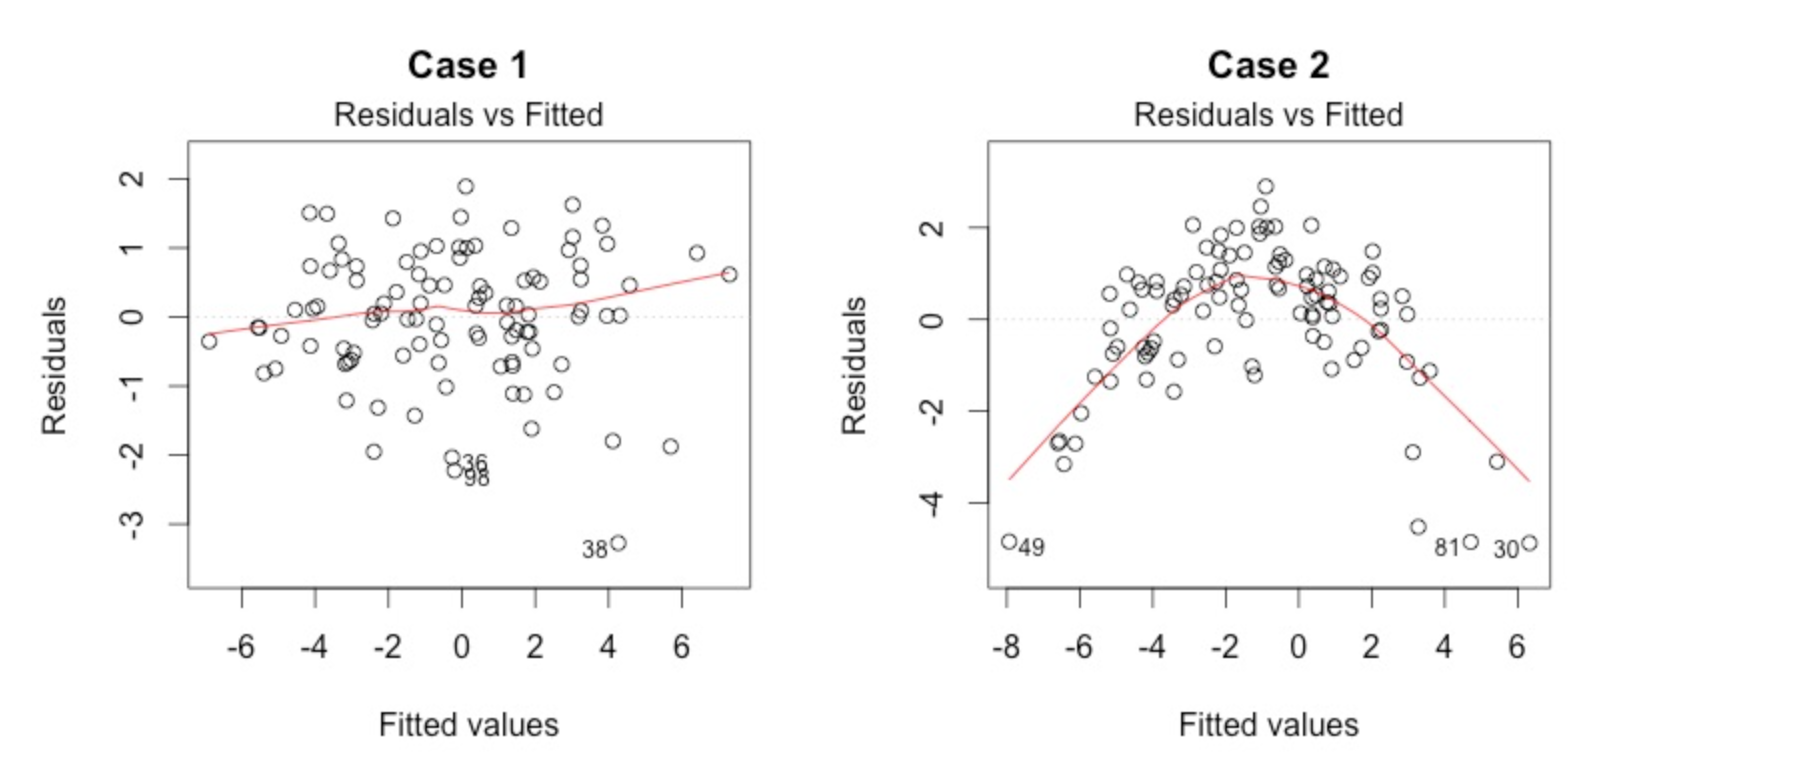

Likewise, we can look to see a model of a good and bad scale-location plot. In the good model, we don't see much of a relationship between our standardized residuals and the fitted values. In Case 2 on the right, there seems to be a wider spread in the residuals as the fitted values grow which is problematic for our model.

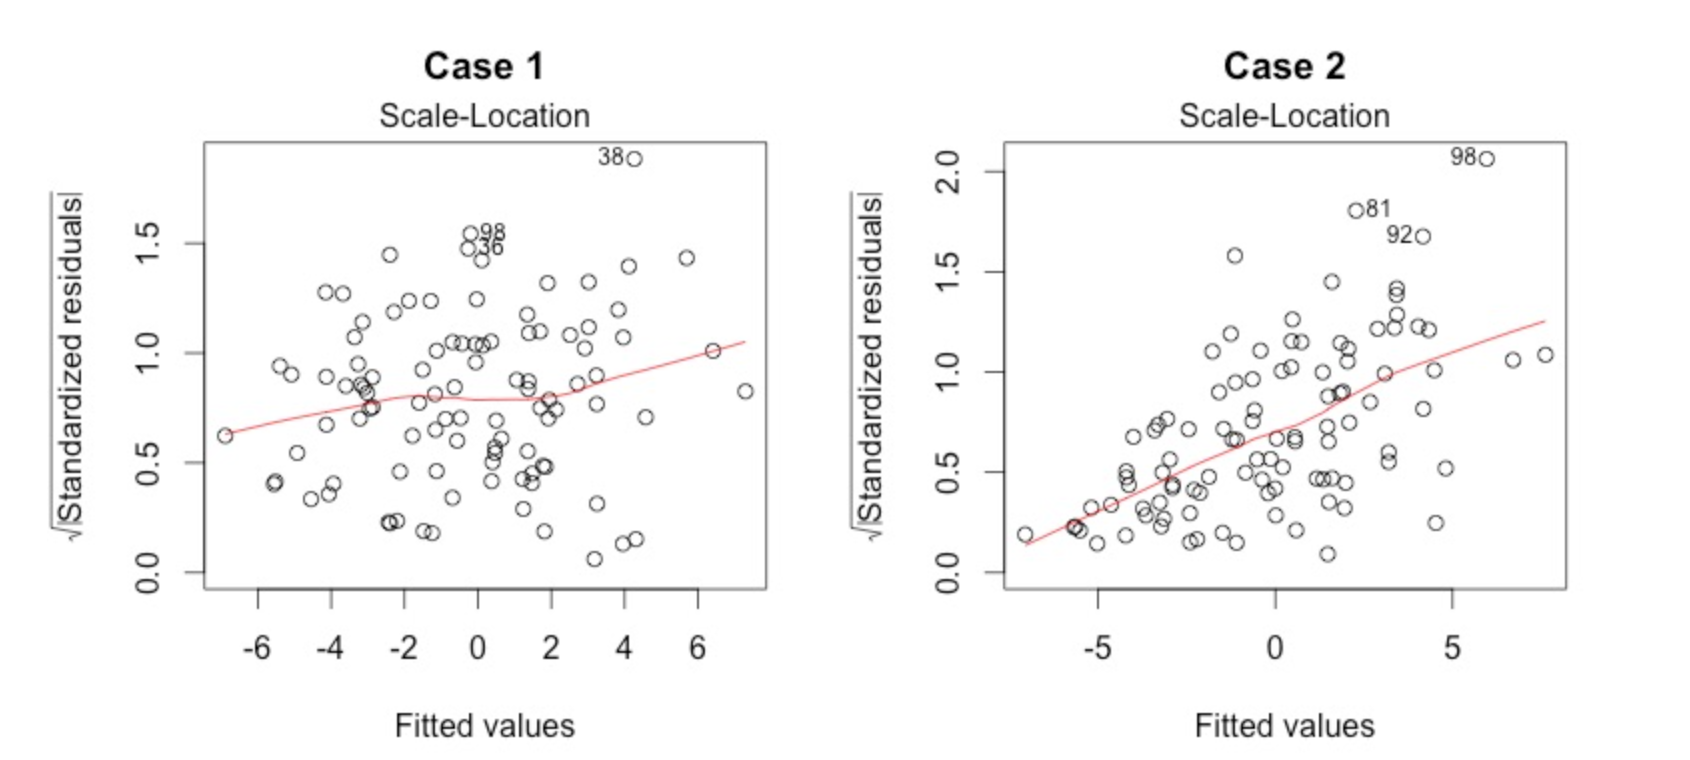

### QQPlot

We now look at a QQPlot to assess the normality of the residuals. In other words, do the residuals follow a bell-curved shape (called a normal distribution)?

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

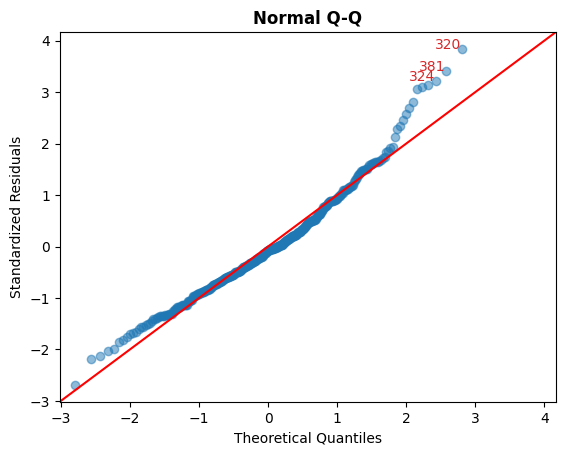

In [ ]:
diag_object.qq_plot()

Ideally, all the standardized residuals should follow the red line. This means taht the residuals are following the normal curve. We see some trailing off at the end which means some residuals are more extreme than what we assume in our model. We can see in some examples:

* Case 1---the QQPlot illustrates residuals that roughly follow a normal distribution
* Case 2---The trailing off means that the residuals don't follow a normal distribution

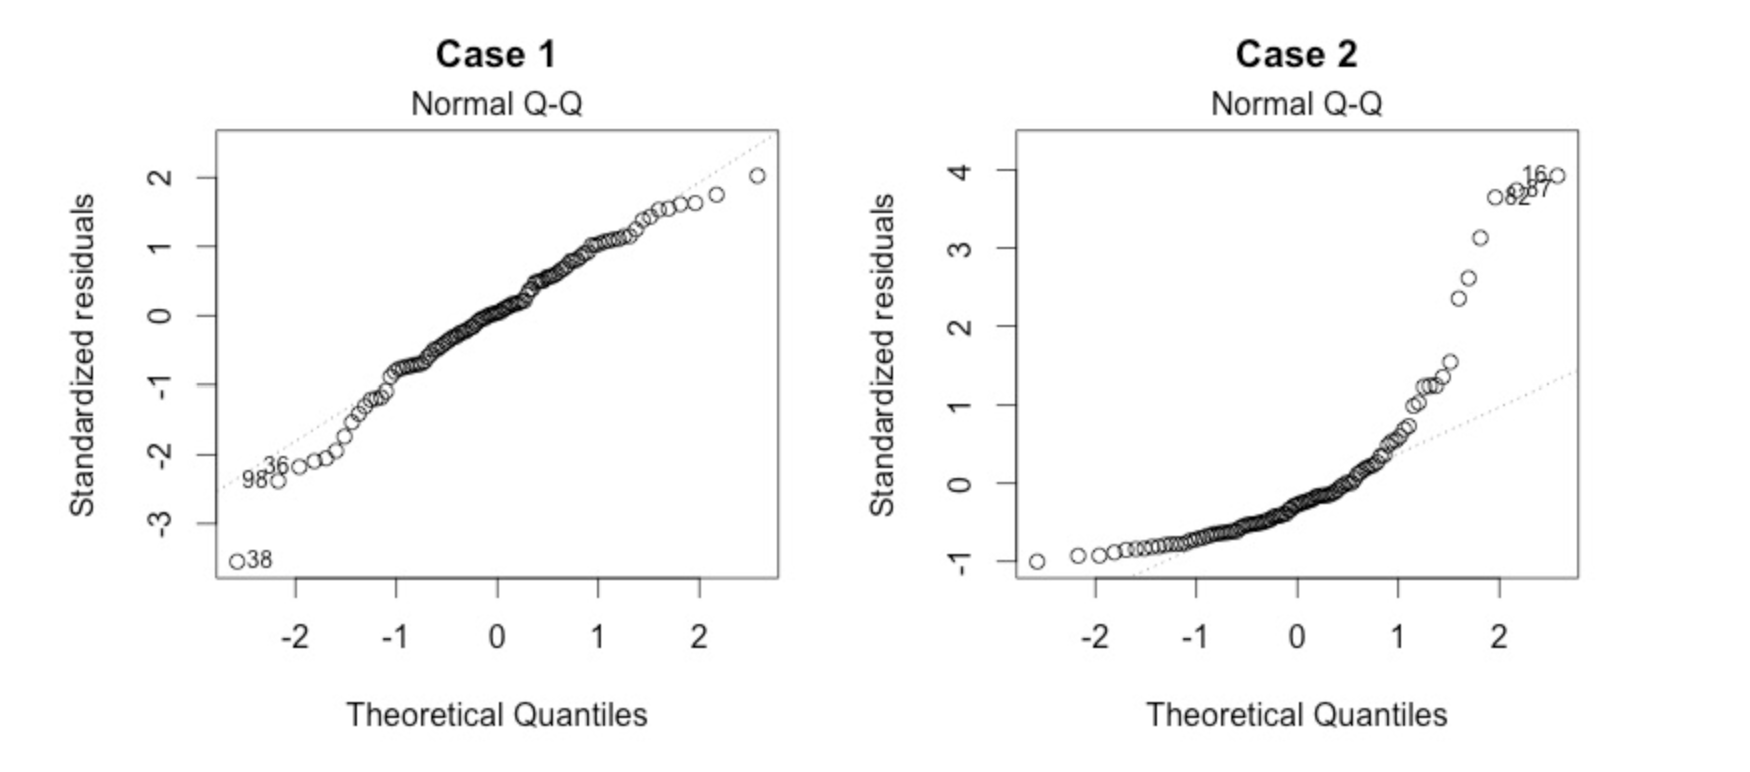

### Residuals Vs. Leverage Plot

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

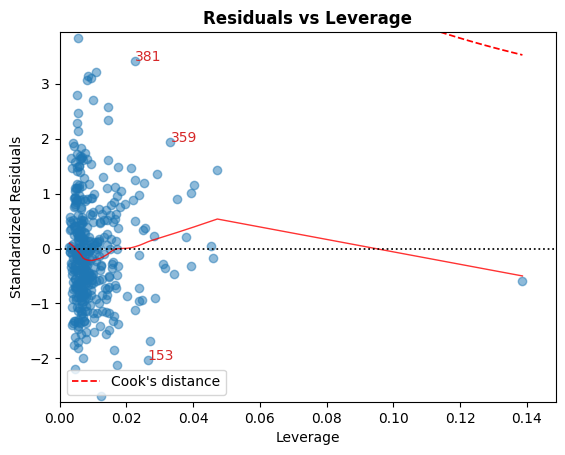

In [ ]:
diag_object.leverage_plot()

Lastly, we check a residuals versus leverage plot. Leverage is a measure of how extreme the points are on the independent variables. Cook's Distance is a measure of how influential the points are that combines leverage with whether a point is an outlier (has large residuals). In our case, none of the points seem to be influential (outside the dotted Cook's Distance bounds)

We can look at the examples below. Case 1 shows a good example where no points are influential while in Case 2 we see that Point 49 is highly influential and is having an extremely large effect on the underlying regression model:

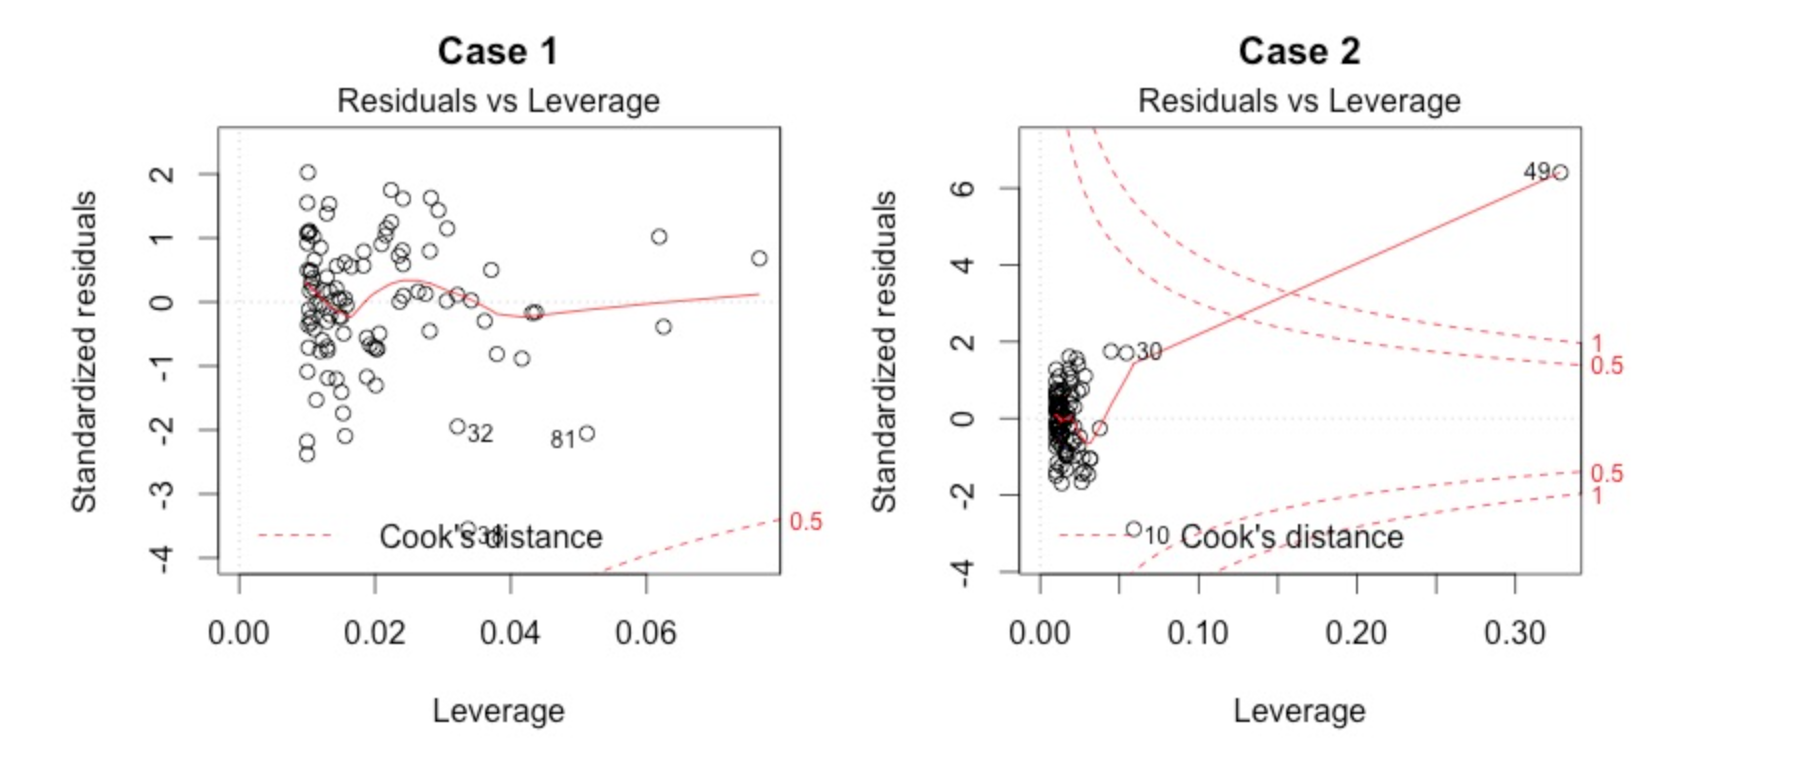

## Transforming Our Model

Based on these plots, let's transform our model. The residual plot indicates a pattern in the residuals that isn't being explained by our model. Likewise, we could even see some of these non-linearities within our original `pairplot()`. As such, we consider transformations. We first think of transforming the y-variable as that is more straightforward, and we can then transform with the x-variables as needed. We try a y-transformation known as a Box-Cox transformation

In [ ]:
transformed_data, lam = stats.boxcox(Auto_subset['mpg'])
print(lam)

0.19123083616287737


For Box-Cox, we take the y variable to the power rounded to the nearest 0.5. The exception is if it rounds to 0 in which case we do a $\log(y)$ or $\log(y + 1)$ transformation if there are zeros for the y-variable. Note that logs in Python default to the natural-log. As we don't have any cars with a mpg of 0, we try a log transformation.

In [ ]:
Auto_subset["mpg_log"] = np.log(Auto_subset["mpg"])

/tmp/ipython-input-14-3389054877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auto_subset["mpg_log"] = np.log(Auto_subset["mpg"])


We first remake our `pairplot()` to see whether the log transformation seems to have helped any of the relationships appear more linear. We see that the $\log$ transformation does seem to have improved the linearity of the relationships.

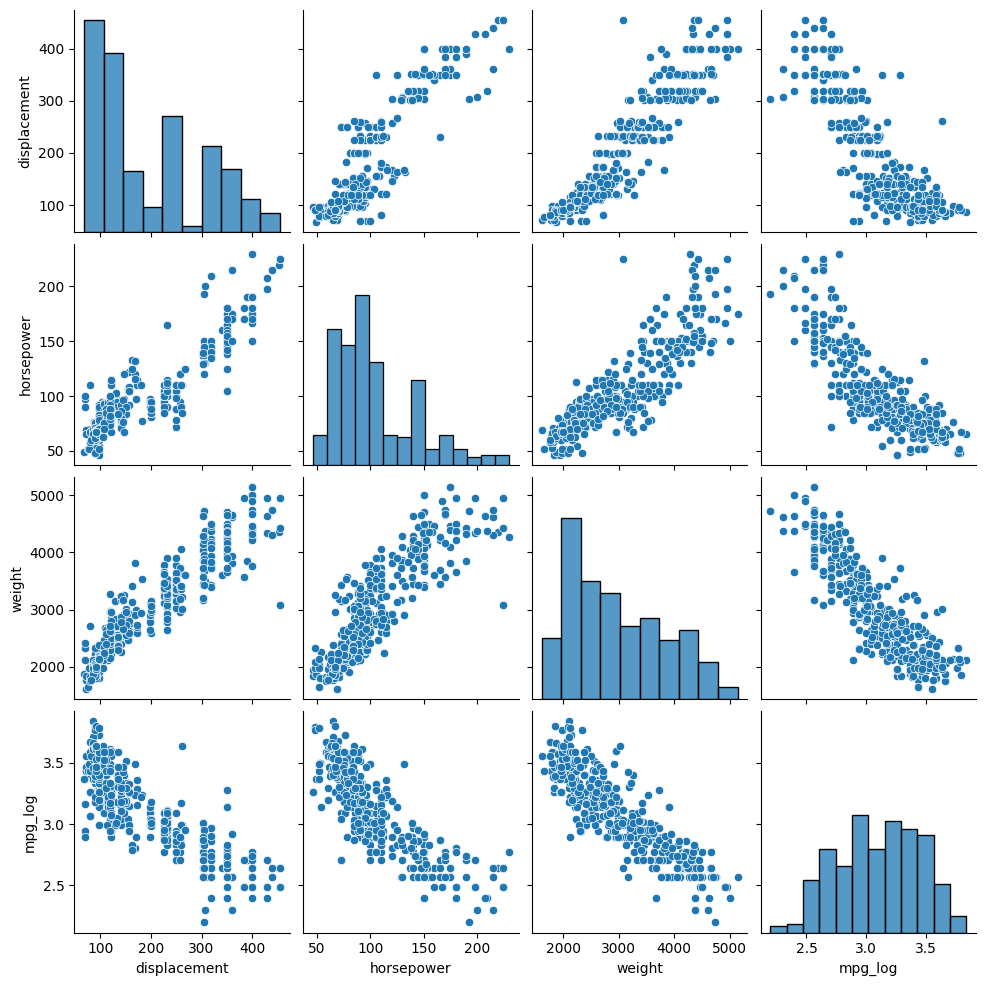

In [ ]:
sns.pairplot(Auto_subset.drop("mpg", axis = 1))

## Fitting and Evaluating the Transformed Model

Let's refit the model with the transformed y-variable and then look again at the model diagnostics

In [ ]:
model_full_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ displacement + horsepower + weight").fit()
model_full_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     483.8
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          1.07e-130
Time:                        17:07:57   Log-Likelihood:                 172.15
No. Observations:                 392   AIC:                            -336.3
Df Residuals:                     388   BIC:                            -320.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0633      0.044     91.922      0.000       3.976       4.150
displacement    -0.0004      0.000     -1.441      0.150      -0.001       0.000
horsepower      -0.0022      0.000     -4.677      0.000      -0.003      -0.001
weight          -0.0002   2.63e-05     -8.487      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        3.298   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.031
Skew:                           0.189   Prob(JB):                        0.220
Kurtosis:                       3.206   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
diag_object_log = LinearRegDiagnostic(model_full_log)
diag_object_log.vif_table()

,Features,VIF Factor
2,horsepower,5.29
3,weight,7.96
1,displacement,10.31
0,Intercept,31.16


VIF is still high! We will return to VIF later

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

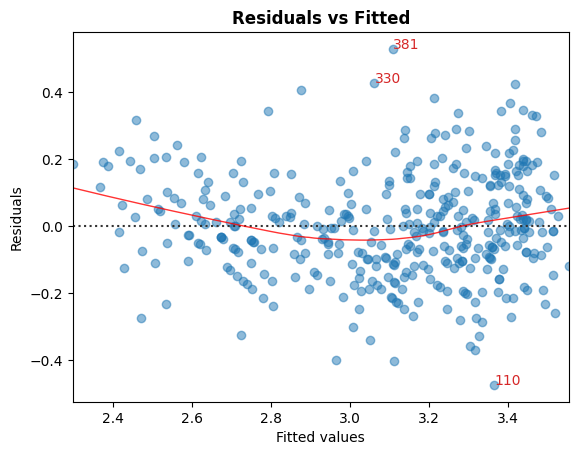

In [ ]:
diag_object_log.residual_plot()

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

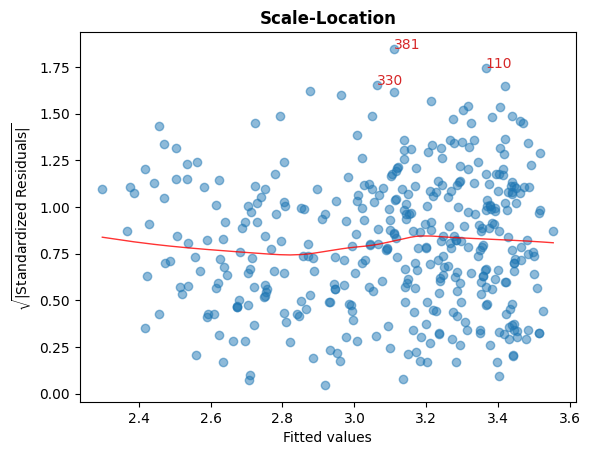

In [ ]:
diag_object_log.scale_location_plot()

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

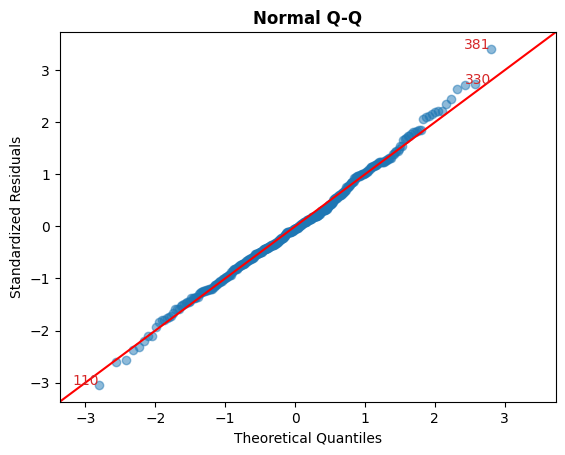

In [ ]:
diag_object_log.qq_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

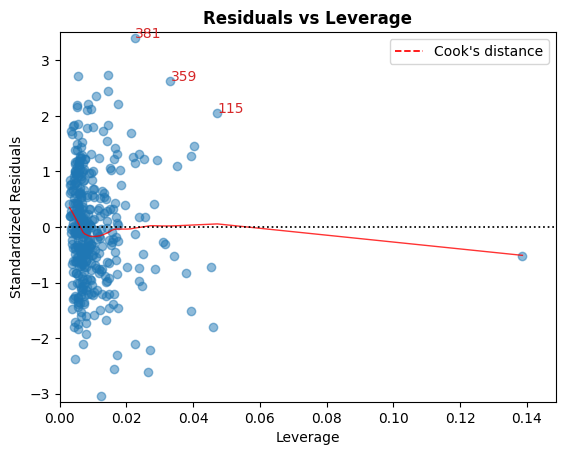

In [ ]:
diag_object_log.leverage_plot()

We see that all of these plots look much better! We no longer see a pattern on the residual plot or scale-location plot. The residuals also look more normal on the QQ plot as well.

## Variable Selection

We see the VIF is still high! As such, we want to do variable selection. To do this, we need to compare the model with all three variables to the best model with just two variables to the best model with a single variable. For comparing models with the **SAME** number of predictors, we can just use $R^{2}$. For comparing models with **DIFFERENT**  numbers of predictors, we can use AIC, BIC, and Adjusted $R^{2}$. We prefer models with **LOW** AIC and BIC and models with **HIGH** Adjusted $R^{2}$.

### Model with 3 Predictors

In [ ]:
model_full_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     483.8
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          1.07e-130
Time:                        17:16:59   Log-Likelihood:                 172.15
No. Observations:                 392   AIC:                            -336.3
Df Residuals:                     388   BIC:                            -320.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0633      0.044     91.922      0.000       3.976       4.150
displacement    -0.0004      0.000     -1.441      0.150      -0.001       0.000
horsepower      -0.0022      0.000     -4.677      0.000      -0.003      -0.001
weight          -0.0002   2.63e-05     -8.487      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        3.298   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.031
Skew:                           0.189   Prob(JB):                        0.220
Kurtosis:                       3.206   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Models with 2 Predictors

In [ ]:
model_2_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ horsepower + weight").fit()
model_2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     722.7
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          9.89e-132
Time:                        17:18:16   Log-Likelihood:                 171.10
No. Observations:                 392   AIC:                            -336.2
Df Residuals:                     389   BIC:                            -324.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1109      0.029    139.983      0.000       4.053       4.169
horsepower    -0.0026      0.000     -6.231      0.000      -0.003      -0.002
weight        -0.0003   1.86e-05    -13.462      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.935
Skew:                           0.150   Prob(JB):                        0.380
Kurtosis:                       3.170   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_2_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ displacement + weight").fit()
model_2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     678.4
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          1.50e-127
Time:                        17:18:20   Log-Likelihood:                 161.40
No. Observations:                 392   AIC:                            -316.8
Df Residuals:                     389   BIC:                            -304.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0060      0.044     91.889      0.000       3.920       4.092
displacement    -0.0009      0.000     -4.262      0.000      -0.001      -0.000
weight          -0.0002   2.66e-05     -9.191      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        8.235   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.952
Skew:                           0.219   Prob(JB):                      0.00690
Kurtosis:                       3.646   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_2_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ displacement + horsepower").fit()
model_2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     583.2
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          8.47e-118
Time:                        17:18:22   Log-Likelihood:                 138.77
No. Observations:                 392   AIC:                            -271.5
Df Residuals:                     389   BIC:                            -259.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7548      0.027    137.211      0.000       3.701       3.809
displacement    -0.0018      0.000     -9.722      0.000      -0.002      -0.001
horsepower      -0.0029      0.001     -5.733      0.000      -0.004      -0.002
==============================================================================
Omnibus:                        4.891   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.690
Skew:                           0.262   Prob(JB):                       0.0959
Kurtosis:                       3.113   Cond. No.                         782.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see the first model with horsepower and weight is the best model among the models with 2 predictors as it has the highest $R^{2}$ of 0.788. Comparing this best 2 variable model to the 3 variable model, the adjusted $R^{2}$ and AIC are similar while the BIC on the 2 variable model is better. As we prefer simpler models, we would likely opt for the 2 variable model over the 3 variable model.

### One Variable Model

Now we compare a one variable model where we eliminate a variable from our best two variable model. I.e. We compare to a model with **JUST** horsepower or **JUST** weight.

In [ ]:
model_1_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ horsepower").fit()
model_1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     864.7
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          5.39e-101
Time:                        17:38:57   Log-Likelihood:                 96.145
No. Observations:                 392   AIC:                            -188.3
Df Residuals:                     390   BIC:                            -180.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8645      0.028    139.194      0.000       3.810       3.919
horsepower    -0.0073      0.000    -29.405      0.000      -0.008      -0.007
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.454
Skew:                           0.045   Prob(JB):                        0.797
Kurtosis:                       3.141   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_1_log = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ weight").fit()
model_1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1282.
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          2.39e-125
Time:                        17:38:59   Log-Likelihood:                 152.45
No. Observations:                 392   AIC:                            -300.9
Df Residuals:                     390   BIC:                            -293.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1421      0.030    136.660      0.000       4.083       4.202
weight        -0.0004   9.79e-06    -35.808      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        5.551   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.181
Skew:                           0.172   Prob(JB):                       0.0455
Kurtosis:                       3.511   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The best one variable model is with just weight as it has a $R^{2}$ of 0.767. We now need to compare it our best model with 2 predictors which had both weight and horsepower. We see the adjusted $R^{2}$ from our 2 variable model to our 1 variable model goes down from 0.787 to 0.767. The AIC goes up from -336.2 to -300.9 while the BIC goes up from -324.3 to -293.0. As such, the one variable model is worse than the two variable model.

## Final Model Diagnostics and Interpretation

We now take the 2 variable model as our final model. We rerun the diagnostics to verify the fit and then interpret the model.

In [ ]:
model_final = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ horsepower + weight").fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     722.7
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          9.89e-132
Time:                        17:43:30   Log-Likelihood:                 171.10
No. Observations:                 392   AIC:                            -336.2
Df Residuals:                     389   BIC:                            -324.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1109      0.029    139.983      0.000       4.053       4.169
horsepower    -0.0026      0.000     -6.231      0.000      -0.003      -0.002
weight        -0.0003   1.86e-05    -13.462      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.935
Skew:                           0.150   Prob(JB):                        0.380
Kurtosis:                       3.170   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
diag_final = LinearRegDiagnostic(model_final)
diag_final.vif_table()

,Features,VIF Factor
2,weight,3.96
1,horsepower,3.96
0,Intercept,13.72


We see our VIF is now improved and is below 5! Removing displacement has improved the multicollinearity of our model.

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

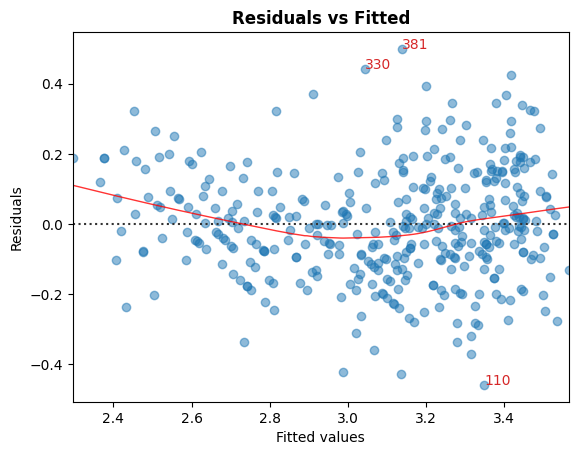

In [ ]:
diag_final.residual_plot()

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

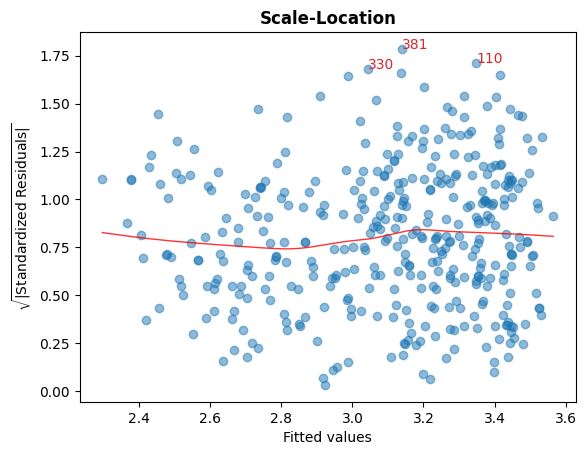

In [ ]:
diag_final.scale_location_plot()

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

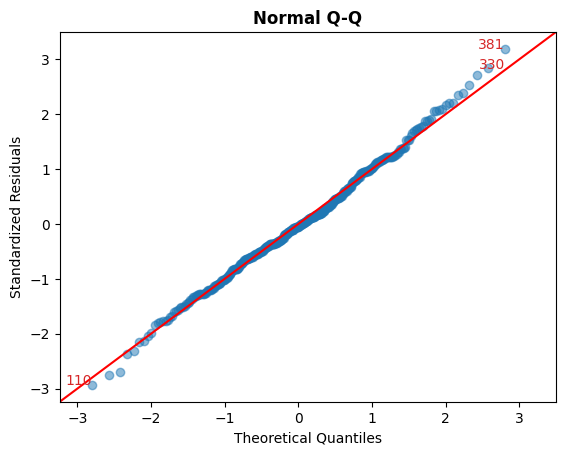

In [ ]:
diag_final.qq_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

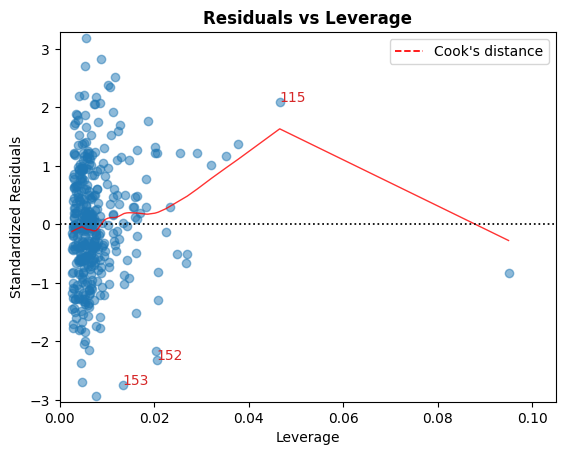

In [ ]:
diag_final.leverage_plot()

All of our diagnostic plots still look good! The residuals appear like random scatter, they seem to be normally distributed, and there don't appear to be any influential points.

### Interpreting Final Model

In [ ]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     722.7
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          9.89e-132
Time:                        17:46:08   Log-Likelihood:                 171.10
No. Observations:                 392   AIC:                            -336.2
Df Residuals:                     389   BIC:                            -324.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1109      0.029    139.983      0.000       4.053       4.169
horsepower    -0.0026      0.000     -6.231      0.000      -0.003      -0.002
weight        -0.0003   1.86e-05    -13.462      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.935
Skew:                           0.150   Prob(JB):                        0.380
Kurtosis:                       3.170   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We now want to interpret our model. We first interpret our variables on the log scale as follows:

* Intercept: When horsepower and weight are both 0, we predict that the car will have a log mpg of 4.1
* Horsepower: For every one unit increase in horsepower, we predict that the log mpg will decrease by 0.0026 after controlling for weight.
* Weight: For every one lb increase in weight, we predict that the log mpg will decrease by 0.0003 after controlling for horsepower.

It is hard to interpret these coefficients on the log-scale. For a log dependent variable, we can raise e to each coefficient and then interpret coefficients in percentage terms.

Let's start with the intercept:

In [ ]:
np.exp(model_final.params[0])

/tmp/ipython-input-40-1974770334.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(model_final.params[0])


61.00447607503782

This means that for a car with a horsepower of 0 and a weight of 0 lbs, we predict it will achieve 61 mpg

We will then move onto the coefficient for horsepower. We can exponentiate it and subtract 1 to interpret it on the original scale

In [ ]:
np.exp(model_final.params[1]) - 1

/tmp/ipython-input-42-1039317094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(model_final.params[1]) - 1


-0.0025540701432097412

This means for a one unit increase in horsepower, we predict a 0.26% decrease in the car's mpg after controlling for weight.

Finally, we do this analysis for the coefficient for weight. We again exponentiate it and subtract 1 to interpret it on the original scale.

In [ ]:
np.exp(model_final.params[2]) - 1

/tmp/ipython-input-43-2820459958.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(model_final.params[2]) - 1


-0.0002503296173348435

This means that for a 1 lb increase in weight, we predict a 0.025% decrease in the car's mpg after controlling for horsepower.

We can also note that the $R^{2}$ is 0.788 on the log-scale. This means that 78.8% of the variability in the log of mpg is explained by the model with weight and horsepower. Note that this interpretation is on the log-scale rather than the original scale.

## Multiple Hypothesis Testing


Here we want to apply the Bonferroni Correction for multiple hypothesis testing that arose from our model selection procedure. We fit a total of two 3 variable models (the original scale and the log-scale), 3 two variable models, and 2 one variable models. Technically, there is a hypothesis test for the intercept as well, but we don't care about whether the intercept is 0 or not. As such, we are testing $2*3 + 3*2 + 2*1 = 14$ hypotheses. We need to take our $\alpha$ threshold of 0.05 and divide by 14 to compare with the p-values:

In [ ]:
model_final.pvalues

,0
Intercept,0.000000e+00
horsepower,1.204813e-09
weight,3.542015e-34


In [ ]:
alpha_corrected = 0.05/14
alpha_corrected

0.0035714285714285718

In [ ]:
model_final.pvalues <= alpha_corrected

,0
Intercept,True
horsepower,True
weight,True


Here we see the relationships with the horsepower and weight are both statistically significant even after our Bonferroni correction.

# Advanced: Optional Adding Interaction Terms

We might want to look at an interaction term. In other words, is there a synergy between weight and horsepower? Does both weight and horsepower being high mean that we would predict a higher value of log(mpg) than we would if they were operating independently? We can fit a model where we consider weight and horsepower being multiplied together as follows:

$$\log({\text{mpg}}) = \beta_{0} + \beta_{1}*\text{weight} + \beta_{2}*\text{horsepower} + \beta_{3}*\text{weight}*\text{horsepower} $$

We begin by adding in the interaction term of $\text{weight}*\text[horsepower}$ into our dataset.

In [ ]:
Auto_subset["horsepower_weight"] = Auto_subset["horsepower"]*Auto_subset["weight"]

In [ ]:
model_interaction = smf.ols(data=Auto_subset, formula="Q('mpg_log') ~ horsepower + weight + horsepower_weight").fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q('mpg_log')   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     514.3
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          8.85e-135
Time:                        18:29:09   Log-Likelihood:                 181.65
No. Observations:                 392   AIC:                            -355.3
Df Residuals:                     388   BIC:                            -339.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.5121      0.091     49.459      0.000       4.333       4.691
horsepower           -0.0071      0.001     -6.698      0.000      -0.009      -0.005
weight               -0.0004   3.01e-05    -12.009      0.000      -0.000      -0.000
horsepower_weight  1.199e-06   2.59e-07      4.631      0.000     6.9e-07    1.71e-06
==============================================================================
Omnibus:                        4.131   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.337
Skew:                           0.143   Prob(JB):                        0.114
Kurtosis:                       3.429   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We find a small positive interaction term with coefficient $1.199*10^{-6}$. This positive term means that although both horsepower and weight individually have negative relationships with the log of mpg, when both are high together, there is a less strong negative relationship. E.g. we can group coefficients as follows:

$$\widehat{\log(\text{mpg})} = -0.0071*\text{horsepower} + -0.0004*\text{weight} + 1.199*10^{-6}*\text{horsepower}*\text{weight}$$

This is equivalent to $$\widehat{\log(\text{mpg})} = (-0.0071+ 1.199*10^{-6}*\text{weight})*\text{horsepower} + -0.0004*\text{weight} $$

Let's suppose we are holding weight coonstant. This means that as horsepower increases, there is generally a negative association with the log(mpg) but that for higher values of weight, that negative relationship is less strongly negative.